# 第1章 量子情報の基礎

# 量子コンピュータについて

量子コンピュータは長らくタイムマシンと同じくらい実現が不可能な技術だと思われていました。  
1999年に当時NECにいた中村泰信（現東京大学教授）、蔡兆申（現東京理科大学教授）らによって初めての超電導量子ビットが実現されて以来、量子性を保つ時間であるコヒーレンス時間が数々のブレイクスルーによって伸びて、現在GoogleやIBMを始めとして、量子コンピュータの実現に向けた研究が盛んになっています。

### 量子コンピュータというアイディア
Feynmanの提唱の話

### 誤り訂正について
誤り訂正という問題を抱えてて実現は不可能だと思われていたが、
それが可能になった話

### アルゴリズムについて
アイディアは面白かったけど、具体的にどう役に立つの？という中
Shorの素因数分解が提唱された話。PEAやHHLも入れても良い。

量子コンピュータのアイディアが提唱されて初めてのアルゴリズムが考案されてからまだxx年しか経っていません。
今提案されているアルゴリズムだけで量子コンピュータは十分役に立つと分かっていますが、この新しい原理（この書き方はQuantum Native的ではないですね）で動くコンピュータを活用した、新しいアルゴリズムやアプリケーションを作るチャンスは広がっています。


### この数年の量子コンピュータについて
NISQの説明とNISQアルゴリズムについて



## 量子情報の基礎

ここでは、量子コンピュータの仕組みを完全に理解するために必要な量子力学をマスターし、量子コンピュータを用いてどのように行列要素の計算や固有値の推定ができるかをみていくことにする。特に、〜〜〜章では深入りしなかった、テンソル積という考え方が、量子コンピュータを深く理解するうえで必須である。テンソル積の計算は少し複雑であるが、pythonの数式処理ライブラリSymPyでは、量子力学の代数処理がサポートされている。SymPyを用いながら量子力学の理解をすすめながら、量子コンピュータにとってもっとも重要なアルゴリズムである位相推定アルゴリズムを紹介する。

### 量子ビット
古典コンピュータ内部では情報は 0 と 1 の２つの状態で表現されている。例えば、スイッチのオン・オフの状態や、電荷がたまった状態とそうでない状態、電圧の高・低などでその２状態を表現している。一方、量子力学では異なる２つの状態の**重ね合わせ状態**というのが許されているので、量子の世界の情報の最小単位である"量子"ビットは $\alpha$と$\beta$という二つの複素数を用いた複素ベクトルを用いて
$$
\left(
\begin{array}{c}
\alpha 
\\
\beta 
\end{array}
\right)
$$
量子状態が記述される。

$\alpha$や$\beta$はどの程度の重みで0状態と1状態が重ね合わさっている、ということを表しており**複素確率振幅**と呼ばれる。
$\alpha$や$\beta$が複素数になっているのは、量子の世界では0や1といった離散的な量も波の性質をみたし干渉するためである。

古典ビットの0に対応する状態は
$$
\left(
\begin{array}{c}
1 
\\
0
\end{array}
\right)
$$
1に対応する状態は
$$
\left(
\begin{array}{c}
0 
\\
1
\end{array}
\right)
$$
となる。

列ベクトルを毎回書いているとスペースが無駄なので**ディラックのブラケット表記**という簡略化した表記を導入する。これは列ベクトルである、という量子状態の型宣言のようなもので、この記号がついていると量子状態をあらわす複素ベクトルであることが一目でわかるようになっている。

$$
|0\rangle = \left(
\begin{array}{c}
1 
\\
0
\end{array}
\right)
$$
$$
|1\rangle = \left(
\begin{array}{c}
0
\\
1
\end{array}
\right)
$$
この表記を用いると量子ビットは
$$
|\psi \rangle = \alpha |0\rangle + \beta |1\rangle 
$$
と書かれる（スペースが省略できた！）。

### 複素確率振幅の意味

複素確率振幅はいったいどのような物理的実体に対応するだろうか。実は、量子力学では観測者（人間）は直接複素確率振幅にはアクセスすることができず、**測定という操作をした時に初めて0か1かが確率的にきまる** 0もしくは1になる確率に影響するのが複素確率振幅である：
$$ 
p_0 = |\alpha |^2 
\\
p_1 = |\beta |^2
$$
で表される。確率が1になるために、規格化条件 $|\alpha |^2 + |\beta |^2 =1$を課す。


つまり、量子状態とは、大きさが１に規格化された複素ベクトルによって記述され、各成分の絶対値の２乗が測定をしたときにその成分に対応する状態を得る確率に対応している。なので、
$$
|0\rangle = \left(
\begin{array}{c}
1 
\\
0
\end{array}
\right), |1\rangle = \left(
\begin{array}{c}
0
\\
1
\end{array}
\right)
$$
は、確実に0や1が得られる古典的な状態に対応し、
$$
\frac{1}{\sqrt{2}}
(|0\rangle + |1\rangle) = \left(
\begin{array}{c}
\frac{1}{\sqrt{2}}
\\
\frac{1}{\sqrt{2}}
\end{array}
\right)
$$
は0と1が同じおもみで重ね合わさった状態であり、測定をすると0と1が確率1/2で完全にランダムに得られる。

　複素数も用いてよいので、
$$
\frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle ) 
= 
\left( 
\begin{array}{c}
\frac{1}{\sqrt{2}}
\\
\frac{i}{\sqrt{2}}
\end{array}
\right)
$$
といった状態も許されている。

一般に
$$
\frac{1}{\sqrt{2}} ( |0\rangle + e^{ i \phi } |1\rangle )
$$
なども許されている。

### SymPyを用いて量子ビットを表示してみる
SymPyでは、量子状態の型が用意されている。初期化された量子ビットを準備する場合は ` Qubit() ` 関数を用いて


In [5]:
from IPython.display import HTML, Image, display, display_png
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra

init_printing() # ベクトルや行列を綺麗に表示するため
def setup_mathjax():
    display(HTML('''
    <script>
        if (!window.MathJax) {
            var script = document.createElement("script");
            script.async = "async";
            script.src = "https://colab.research.google.com/static/mathjax/MathJax.js?config=TeX-AMS_HTML-full,Safe&delayStartupUntil=configured";
            document.head.appendChild(script);
        }
    </script>
    '''))
get_ipython().events.register('pre_run_cell', setup_mathjax)

psi = Qubit('0')

In [6]:
psi #ブラケット表示

In [7]:
represent(psi) #列ベクトル表示

SymPyでは文字をシンボルとして扱うことができるので、一般的な量子ビットも、

In [8]:
a, b = symbols('alpha, beta')  #a, bをシンボルとして、alpha, betaとして表示
ket0 = Qubit('0')
ket1 = Qubit('1')
psi = a * ket0 + b* ket1
psi # 状態をそのまま書くとケットで表示してくれる

行列表示は、

In [0]:
represent(psi)

もちろん具体的な数値を代入することもできる。

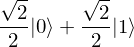

In [0]:
psi.subs([([a,1/sqrt(2)]),([b,1/sqrt(2)])]) # alpha, betaに具体的な数字を代入

### 量子ビットに対する基本演算

古典計算がAND、OR、NOT、NANDなどの論理演算から
構成されるのと同様、量子計算も基本的な演算から構成される。
量子力学では時間発展はつねに線型なので、**量子コンピュータ上で許された操作は状態ベクトルに対する線型変換**ということになる
。
１つの量子ビットの量子状態は規格化された２次元複素ベクトル
として表現されるのだった。それに対する線型演算は$2 \times 2$の
複素行列によって表現される。規格化条件（確率の合計は1）を守りたいので、
転置と複素共役（エルミート共役）が逆行列になるようなユニタリー行列
$$
U U^{\dagger} = I
$$ 
（ただし、${}^\dagger$は転置と複素共役を意味する）
が量子演算に対応する。

１つの量子ビットに作用する基本的な量子演算
として**パウリ演算子**を導入する。
\begin{eqnarray}
I&=&
\left(\begin{array}{cc}
1 & 0
\\
0 & 1
\end{array}
\right),\;\;\;
X=
\left(\begin{array}{cc}
0 & 1
\\
1 & 0
\end{array}
\right),\;\;\;
Y &=&
\left(\begin{array}{cc}
0 & -i
\\
i & 0
\end{array}
\right),\;\;\;
Z=
\left(\begin{array}{cc}
1 & 0
\\
0 & -1
\end{array}
\right).
\end{eqnarray}

$X$は古典ビットの反転（NOT）に対応し
$$X|0\rangle = |1\rangle, \;\;
X|1\rangle = |0\rangle
$$
のように作用する。

重ね合わせのある量子ビットの場合は、
$|0\rangle$と$|1\rangle$の位相も
情報として保持できるので、位相を反転
$$Z|1\rangle = -|1\rangle$$
させる$Z$演算子も定義されている。

例えば、
$$
Z \frac{1}{\sqrt{2}} ( |0\rangle + |1\rangle ) = \frac{1}{\sqrt{2}} ( |0\rangle - |1\rangle ) 
$$
となる。

$Y = i XZ$演算子は位相の反転とビットの反転を
組み合わせたもの（全体にかかる複素数$i$を除いて）であると
考えることができる。

パウリ演算子の作用を
$$
\left( 
\begin{array}{cc}
0 & 1 
\\
1 & 0 
\end{array}
\right)
\left( 
\begin{array}{c}
1 
\\
0 
\end{array}
\right)
=
\left( 
\begin{array}{c}
0
\\
1 
\end{array}
\right)
$$
のように計算してもよいが、上記のようにディラックのブラケット表記をつかって計算をしたほうが圧倒的に楽。

### SymPyを用いた一量子ビット演算
SymPyではよく使う基本演算はあらかじめ定義されている。

In [2]:
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP, CPHASE

演算子は何番目の量子ビットに作用するか、
というのを指定して `X(0)` のように定義すっる。
また、これを行列表示するときには、いくつの量子ビットの空間で表現するか 
`nqubits`というのを指定する必要がある。
まだ、量子ビットは１つしかいないので、
`X(0)`、`nqubits=1`としておこう。

In [3]:
X(0)

X(0)

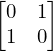

In [9]:
represent(X(0),nqubits=1)  # パウリX

同様に、Y,Zなども利用することができる。それに加え、アダマール演算 `H` や、位相演算 `S`、そしてpi/4の位相演算
 `T` も利用することができる：

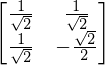

In [0]:
represent(H(0),nqubits=1)

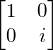

In [0]:
represent(S(0),nqubits=1)

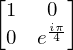

In [0]:
represent(T(0),nqubits=1)

これらの演算を状態に作用させるのは、

In [0]:
S(0)*Y(0)*X(0)*H(0)*ket0

のように `*`で書くことができる。実際に計算をする場合は `qapply()`を利用する。

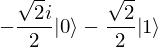

In [0]:
qapply(S(0)*Y(0)*X(0)*H(0)*ket0)

この列ベクトル表示が必要な場合は、

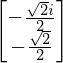

In [0]:
represent(qapply(S(0)*Y(0)*X(0)*H(0)*ket0))

のような感じで、SymPyは簡単な行列の計算はすべて自動的にやってくれる。

### ブラケット表記のまとめ（必要であればコラムへ）
列ベクトルは 
$$
|\psi \rangle = \left( 
\begin{array}{c}
\alpha
\\
\beta 
\end{array}
\right)
$$
とかくのであった。同様に、行ベクトルは
$$
\langle \psi | = ( |\psi \rangle ) ^{\dagger} = ( \alpha ^* , \beta ^*)
$$
とかく。${\dagger}$マークは転置と複素共役を取る操作で、列ベクトルを行ベクトルへと移す。

２つのベクトル、
$$
|\psi \rangle = \left( 
\begin{array}{c}
\alpha
\\
\beta 
\end{array}
\right), \;\;\;
|\phi \rangle = \left( 
\begin{array}{c}
\gamma
\\
\delta
\end{array}
\right)
$$
があったとする。ブラケットを抱き合わせると
$$
\langle \phi | \psi \rangle = (\gamma ^* , \delta ^* ) \left( 
\begin{array}{c}
\alpha
\\
\beta 
\end{array}
\right) = \gamma ^* \alpha + \delta ^* \beta 
$$
となり、**内積**に対応する。

逆に、背中合わせにあすると
$$
|\phi \rangle \langle \psi | = \left( 
\begin{array}{c}
\gamma
\\
\delta
\end{array}
\right) (\alpha ^* , \beta ^*) = \left( 
\begin{array}{cc}
\gamma \alpha ^*  & \gamma \beta ^* 
\\
\delta \alpha ^*   & \delta \beta ^*
\end{array}
\right)
$$
となり、演算子となる。例えば、
$$
X= |0\rangle \langle 1 | + |1\rangle \langle 0|
$$
となる。このことを覚えておけば
$$
\langle 0| 0\rangle = \langle 1 | 1\rangle = 1, \;\;\; \langle 0 | 1 \rangle = \langle 1 | 0 \rangle = 0
$$
から 
$$
X |0\rangle = |1\rangle
$$
を行列を書かずに計算できるようになる。**このように量子情報のほとんどの解析計算において実際にベクトルの要素を書き下して計算をすることはほとんどなく、ブラケットを使って形式的に書く場合が多い**（古典計算機上で量子コンピュータをシミュレーションする場合はベクトルをすべて書き下すことになる）。

同様に、
$$
I = |0\rangle \langle 0 | + |1\rangle \langle 1| , \;\;\; Z = |0\rangle \langle 0| - |1\rangle \langle 1| 
$$
も覚えておくと便利。

### 複数量子ビットの記述

$n$個の古典ビットの状態は$n$個の$0,1$の数字によって表現され、
そのパターンの総数は$2^n$個ある。

量子力学では、これらすべてのパターンの重ね合わせ状態が許されているので、どのビット列がどのような重みで重ね合わせになっているかという$2^n$個の複素確率振幅で記述される：
\begin{eqnarray}
|\psi \rangle &= & 
c_{00...0} |00...0\rangle 
+ c_{00...1} |00...1\rangle 
+ \cdots 
+ c_{11...1} |11...1\rangle
=  
\left(
\begin{array}{c}
c_{00...0}
\\
c_{00...1}
\\
\vdots
\\
c_{11...1}
\end{array}
\right).
\end{eqnarray}
ただし、
複素確率振幅は規格化
$\sum _{i_1,..., i_n} |c_{i_1...i_n}|^2=1$
されているものとする。

**このように$n$量子ビットの重ね合わせ状態は、
$n$に対して指数的に大きい$2^n$次元の
複素ベクトル空間で記述する必要があり、
ここに古典ビットと量子ビットの違いが顕著に現れる**。

量子コンピュータとは量子ビット数に対して指数的なサイズの複素ベクトルを物理法則に従ってユニタリー変換するコンピュータのことである。

この$n$量子ビットの量子状態を測定すると
ビット列$i_1 ... i_n$が確率
\begin{eqnarray}
p_{i_1 ... i_n} &=&|c_{i_1 ... i_n}|^2
\label{eq02}
\end{eqnarray}
でランダムに得られる。

初期状態として
$$ 
|00...0\rangle 
$$
を準備したとき
$$
\left(
\begin{array}{c}
c_{00...0}
\\
c_{00...1}
\\
\vdots
\\
c_{11...1}
\end{array}
\right)　
= 
\left(
\begin{array}{c}
1
\\
0
\\
\vdots
\\
0
\end{array}
\right)　
.
$$

 2量子ビットの場合は、 00, 01, 10, 11 の４通りの状態の重ね合わせがとりうるので
$$
c_{00} |00\rangle + c_{01} |01\rangle + c_{10}|10\rangle + c_{11} |11\rangle  = 
\left( 
\begin{array}{c}
c_{00}
\\
c_{01}
\\
c_{10}
\\
c_{11}
\end{array}
\right)
$$
と一般的にかける。

２量子ビットに作用する演算としてもっとも重要なのが制御NOT演算（CNOT）
\begin{eqnarray}
\Lambda(X) =
\left(
\begin{array}{cccc}
1 & 0 & 0& 0
\\
0 & 1 & 0& 0
\\
0 & 0 & 0 & 1
\\
0 & 0 & 1& 0
\end{array}
\right)
\end{eqnarray}
がある。
4行4列の行列成分はそれぞれ$|00\rangle,|01\rangle,|10\rangle, |01\rangle$
成分に対応する。

つまり、
１つめの量子ビットが$|0\rangle$の場合は何もせず（恒等演算$I$が作用）、
$|1\rangle$の場合に２つめの量子ビットに$X$を作用させる。
１つ目の量子ビットを制御量子ビット、２つめの量子ビットをターゲット量子ビットと呼ぶ。
制御NOT演算の作用は、$\oplus$を mod 2の足し算として、
\begin{eqnarray}
\Lambda(X) |ij \rangle = |i \;\; (i\oplus j)\rangle
\end{eqnarray}
と書けるので、古典計算における排他的論理和（XOR）を可逆にしたものである。
例えば、１つめの量子ビットを$|0\rangle$と$|1\rangle$の
重ね合わせ状態にし、２つめの量子ビットを$|0\rangle$として
\begin{eqnarray}
\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle )\otimes |0\rangle 
=
\frac{1}{\sqrt{2}}
\left(
\begin{array}{c}
1
\\
0
\\
1
\\
0
\end{array}
\right)
\end{eqnarray}
にCNOTを作用させると、
\begin{eqnarray}
\frac{1}{\sqrt{2}}( |00\rangle + |11\rangle )
=
\frac{1}{\sqrt{2}}
\left(
\begin{array}{c}
1
\\
0
\\
0
\\
1
\end{array}
\right)
\end{eqnarray}
が得られる。

例：CNOT ゲートを組み合わせることでSWAP ゲートを作ることができる。
$$\Lambda(X)_{i,j}$$ をi 番目の量子ビットを制御、j 番目の量子ビットをターゲットとするCNOT ゲートとして、
$$
\begin{eqnarray}
SWAP &=& \Lambda(X)_{1,2} \Lambda(X)_{2,1} \Lambda(X)_{1,2}
&=&
\left(
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{array}
\right)
\left(
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{array}
\right)
\left(
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{array}
\right)
&=&
\left(
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{array}
\right)
\end{eqnarray}
$$
のように書ける。これは1 番目の量子ビットと2 番目の量子ビットが交換するゲートであることが分かる。

### テンソル積の計算
手計算や解析計算で威力を発揮するのは、**テンソル積**（$\otimes$）である。
これは、複数の量子ビットがある場合に、それをどのようにして、上で見た大きな一つのベクトルへと変換するのか？という計算のルールを与えてくれる。

量子力学の世界では、２つの量子状態$|\psi \rangle$と$|\phi \rangle$があるとき、
$$
|\psi \rangle \otimes |\phi\rangle
$$
とテンソル積 $\otimes$ を用いて書く。このような複数の量子系からなる系のことを**複合系**と呼ぶ。例えば２量子ビット系は複合系である。

基本的にはテンソル積は、**多項式と同じような計算ルール**で計算してよいと思っていい。
例えば、
$$ 
(\alpha |0\rangle + \beta |1\rangle )\otimes (\gamma |0\rangle + \delta |1\rangle )
= \alpha \gamma |0\rangle |0\rangle + \alpha \delta |0\rangle |1\rangle + \beta \gamma |1 \rangle | 0\rangle + \beta \delta |1\rangle |1\rangle 
$$
のように計算する。列ベクトル表示すると、$|00\rangle$, $|01\rangle$, $|10\rangle$, $|11\rangle$に対応する4次元ベクトル、
$$
\left(
\begin{array}{c}
\alpha
\\
\beta
\end{array}
\right)
\otimes 
\left(
\begin{array}{c}
\gamma
\\
\delta
\end{array}
\right)
=
\left(
\begin{array}{c}
\alpha \gamma
\\
\alpha \delta
\\
\beta \gamma
\\
\beta \delta
\end{array}
\right)
$$
を得る計算になっている。


### SymPyを用いたテンソル積の計算


In [0]:
a,b,c,d = symbols('alpha,beta,gamma,delta')
psi = a*Qubit('0')+b*Qubit('1')
phi = c*Qubit('0')+d*Qubit('1')

In [0]:
TensorProduct(psi, phi) #テンソル積

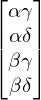

In [0]:
represent(TensorProduct(psi, phi))

さらに$|\psi\rangle$とのテンソル積をとると８次元のベクトルになる：


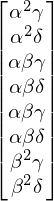

In [0]:
represent(TensorProduct(psi,TensorProduct(psi, phi)))

### 演算子のテンソル積
演算子についても何番目の量子ビットに作用するのか、というのをテンソル積をもちいて表現することができる。たとえば、１つめの量子ビットには$A$という演算子、2つめの演算子には$B$を作用させるという場合には、
$$ A \otimes B$$
としてテンソル積演算子が与えられる。
$A$と$B$をそれぞれ、2×2の行列とすると、$A\otimes B$は4×4の行列として
$$
\left(
\begin{array}{cc}
a_{11} & a_{12}
\\
a_{21} & a_{22}
\end{array}
\right)
\otimes 
\left(
\begin{array}{cc}
b_{11} & b_{12}
\\
b_{21} & b_{22}
\end{array}
\right)
=
\left(
\begin{array}{cccc}
a_{11} b_{11} & a_{11} b_{12} & a_{12} b_{11} & a_{12} b_{12}
\\
a_{11} b_{21} & a_{11} b_{22} & a_{12} b_{21} & a_{12} b_{22}
\\
a_{21} b_{11} & a_{21} b_{12} & a_{22} b_{11} & a_{22} b_{12}
\\
a_{21} b_{21} & a_{21} b_{22} & a_{22} b_{21} & a_{22} b_{22}
\end{array}
\right)
$$
のように計算される。



テンソル積状態 
$$|\psi \rangle \otimes | \phi \rangle $$ 
に対する作用は、
$$ (A|\psi \rangle ) \otimes (B |\phi \rangle )$$
となり、それぞれの部分系$|\psi \rangle$と$|\phi\rangle$に$A$と$B$が作用する。
足し算に対しては、多項式のように展開してそれぞれの項を作用させればよい。
$$
(A+C)\otimes (B+D) |\psi \rangle \otimes | \phi \rangle
=(A \otimes B +A \otimes D + C \otimes B + C \otimes D) |\psi \rangle \otimes | \phi \rangle
\\
=
(A|\psi \rangle) \otimes (B| \phi \rangle)
+(A|\psi \rangle) \otimes (D| \phi \rangle)
+(C|\psi \rangle) \otimes (B| \phi \rangle)
+(C|\psi \rangle) \otimes (D| \phi \rangle)
$$


テンソル積やテンソル積演算子は左右横並びで書いているが、本当は
$$
\left(
\begin{array}{c}
A
\\
\otimes 
\\
B
\end{array}
\right)
\begin{array}{c}
|\psi \rangle 
\\
\otimes 
\\
|\phi\rangle
\end{array}
$$
のように縦に並べた方がその作用の仕方わかりやすいのかもしれない。

CNOT演算を用いた例えばエンタングル状態は、
$$
\left(
\begin{array}{c}
|0\rangle \langle 0|
\\
\otimes 
\\
I
\end{array}
+
\begin{array}{c}
|1\rangle \langle 1|
\\
\otimes 
\\
X
\end{array}
\right)
\left(
\begin{array}{c}
\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
\\
\otimes 
\\
|0\rangle
\end{array}
\right)
=
\frac{1}{\sqrt{2}}\left(
\begin{array}{c}
|0 \rangle 
\\
\otimes 
\\
|0\rangle
\end{array}
+
\begin{array}{c}
|1 \rangle 
\\
\otimes 
\\
|1\rangle
\end{array}
\right)
$$
のようになる。

### SymPyを用いた演算子のテンソル積
演算子は何番目の量子ビットに作用するか、というのを指定しているので、すでにテンソル積構造をもっている。

`H(0)` は、1量子ビット空間で表示すると

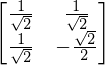

In [0]:
represent(H(0),nqubits=1)

CNOT演算は、

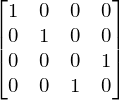

In [0]:
represent(CNOT(1,0),nqubits=2)

2量子ビット空間で表示すると、$I \otimes H$に対応しており、

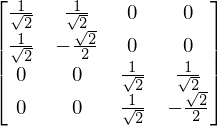

In [0]:
represent(H(0),nqubits=2)

パウリ演算子のテンソル積$X\otimes Y \otimes Z$も、

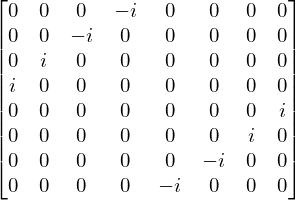

In [0]:
represent(X(0)*Y(1)*Z(2),nqubits=3)

このようにして、上記のテンソル積のルールを実際にたしかめてみることができる。

しかし実際、入力に作用させると、

In [0]:
simplify(qapply(PhaEst*Qubit("00011")))

のように設計通り単純な解が得られることが確認できる。実際、補助量子ビット2,3,4にそれぞれ、011が得られたので固有値の位相の２進小数0.011が得られている！他の入力に対しても、

In [0]:
simplify(qapply(PhaEst*Qubit("00000")))

In [0]:
simplify(qapply(PhaEst*Qubit("00010")))

In [0]:
simplify(qapply(PhaEst*Qubit("00001")))

のように、４種類の固有値の位相情報が３つの補助量子ビットに得られた。入力状態が、重ね合わせ状態の場合は、

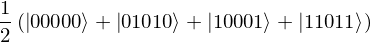

In [0]:
simplify(qapply(PhaEst*H(0)*H(1)*Qubit("00000")))

のように、それぞれの固有ベクトルに対して、固有値の位相が３つの補助量子ビットへと重ね合わせのまま取り出されている。補助量子ビットを測定すると、確率的に、どれか一つの固有ベクトルと固有値が得られる。簡単のためあらかじめ対角化された4×4行列の位相推定を構成したが、もちろん一般のユニタリ$U$に対して動作する。

### 素因数分解と位相推定

位相推定の最も重要な応用の一つである素因数分解アルゴリズムを紹介する．
素因数分解問題は$n$桁の整数$N$が与えられた時に$N$の1ではない約数を
見つける問題であり，従来のコンピュータでは多項式時間で解けるアルゴルズムは
見つかっていない．現在のベストアルゴリズムの計算コストは，
\begin{eqnarray}
O(\exp \left[\frac{64}{9} n (\log n )^2 \right]^{1/3})
\end{eqnarray}
であり，準指数的な計算時間がかかる．
このような素因数分解問題の難しさを利用した暗号RSA暗号などが日常的にも使われている．

P. Shorは1994年に，
量子コンピュータを用いることによって素因数分解問題が桁数$n$に対して多項式時間で解くことができる
ことを示した．これがいわゆるShorの素因数分解アルゴリズムである．

$N$を素因数分解したい整数だとしよう．
$N$と互いに素な整数$x$を見つけてくる．
適当に$x$を選んできて，ユークリッドの互除法によって
最大公約数を計算し，1以外の整数であれば非自明な約数がみつかったことになり，
1しかなければ互いに素な整数であることになる．
この$N$と$x$から公約数を見つけるために，位数$r$を求めることになる．
位数$r$とは，
\begin{eqnarray}
x^r = 1 \textrm{ (mod $N$)}
\label{eq:factor}
\end{eqnarray}
を満たす最小の整数である．
ランダムに$x$を選ぶと，高い確率で$r$は偶数になることが知られている．
$r$が偶数であると，
(\ref{eq:factor})式から
\begin{eqnarray}
(x^{r/2} + 1) (x^{r/2} - 1)  \equiv 0  \textrm{ (mod $N$)}
\end{eqnarray}
のように変形することができる．
このとき，$x^{r/2} + 1$もしくは$x^{r/2} - 1$
の積が mod $N$ で0なので，$x^{r/2} + 1 = 0 \textrm{ (mod $N$)}$になるか，
$x^{r/2} + 1$と$x^{r/2} - 1$が$N$と非自明な公約数をもつかのどちらかになる．
$x$をランダムに選ぶと後者の確率が十分高いことも示すことができ，
最終的に非自明な公約数が見つかることになる．
これを繰り返していくことによって，素数因数へと分解することができる．

　素因数分解の鍵となる位数$r$は、実は入力yをmod Nのもとでx倍するという古典計算に対応したユニタリ行列
$$
U_x = \sum _y |yx {\rm (mod N)}\rangle \langle y|
$$
の固有値を求めることによって決定することができる。実際、固有状態のラベル$0 \leq s \leq r-1$を用いて，固有ベクトルは 
$$
|u_s\rangle = \frac{1}{\sqrt{r}}
\sum _{k=0}^{r-1} e^ {-2 \pi i (s/r) k }|x^k \textrm{ (mod $N$)}\rangle.
$$
と書き下すことができ、
$$
U_x |u_s \rangle =  e^{2 \pi i (s/r)} |u_s \rangle
$$
を満たす。つめり固有値の位相推定から$s/r$を求めその分母として$r$を得ることができる。これがいわゆる、ショアによる素因数分解アルゴリズム（キタエフの位相推定を利用したバージョン）である。

### まとめ
ここでは、SymPyの代数処理機能を用いて、量子力学、特にテンソル積の代数を実際に手を動かしながら確認してきた。簡単な系であれば、このように直接状態をシンボルとして書き出すことができるので、計算の確認などに便利である。そして、SymPyを用いながら、もっとも重要な量子アルゴリズムの一つである位相推定アルゴリズムを紹介した。位相推定アルゴリズムは、あるユニタリ行列$U$の固有値を補助量子ビットに取り出すことができる量子アルゴリズムである。素因数分解は、この位相推定アルゴリズムによって、位数という数字を推定することによって解くことができる。また、量子力学においてエネルギーはハミルトニアンと呼ばれる行列の固有値によって与えられる。もっとも安定的な状態のエネルギーはもっとも小さい値の固有値、安定な状態は対応する固有ベクトルで与えられる。ハミルトニアン自体はユニタリー行列ではないので、行列の指数関数で定義される時間発展に対応するユニタリ行列$e^{-i H t}$に対して位相推定を行うことによって、エネルギーを計算することができる。ほかにも、位相推定による固有値の取り出しを用いて、線形連立方程式の解法や、その機械学習への応用が研究されている。